In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os 
import pandas as pd

#### Read-in your Simulation Results

In [2]:
# Enter your file name:
filename = "c.csv"

wrkdir = os.getcwd()
df = pd.read_csv(f"{wrkdir}/results/{filename}")
df = df[df["arrivalType"]=="current"]

In [3]:
df.head()

,timestamp,simDay,arrivalType,ageGroup,healthState,value
0,2020-12-15,1,current,0-9,asymptomatic,0.0
1,2020-12-15,1,current,0-9,deceased,0.0
2,2020-12-15,1,current,0-9,exposed,0.0
3,2020-12-15,1,current,0-9,infected1,0.0
4,2020-12-15,1,current,0-9,infected2,0.0


In [4]:
df.tail()

,timestamp,simDay,arrivalType,ageGroup,healthState,value
25843,2021-06-12,180,current,80+,infected1,4.097521e+02
25844,2021-06-12,180,current,80+,infected2,3.805146e+02
25845,2021-06-12,180,current,80+,recovered1,1.336807e+05
25846,2021-06-12,180,current,80+,recovered2,5.448773e+05
25847,2021-06-12,180,current,80+,susceptible,2.144178e+06


In [5]:
def plot_it(df, ageGroup):
    
    # Filter by ageGroup
    df = df[df["ageGroup"]==ageGroup]
    df = df[["value", "healthState", "timestamp"]]    
    df = pd.pivot_table(df, index='timestamp', columns='healthState', values='value').reset_index()

    # plot filtered df 
    df_plot = df.copy(deep=True)
    figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
    states = ["susceptible", "exposed", "asymptomatic", "infected1", "infected2", "recovered1", "recovered2", "deceased"]
    df_plot.plot(x='timestamp', y=states, 
                 title = f'Health State Change Over Time\n Age Group: {ageGroup}',
                 xlabel= 'Day',
                 ylabel= 'Population in Health State',
                 figsize=(15,10))
    plt.show()

### Plot Single Age Group

<Figure size 1600x800 with 0 Axes>

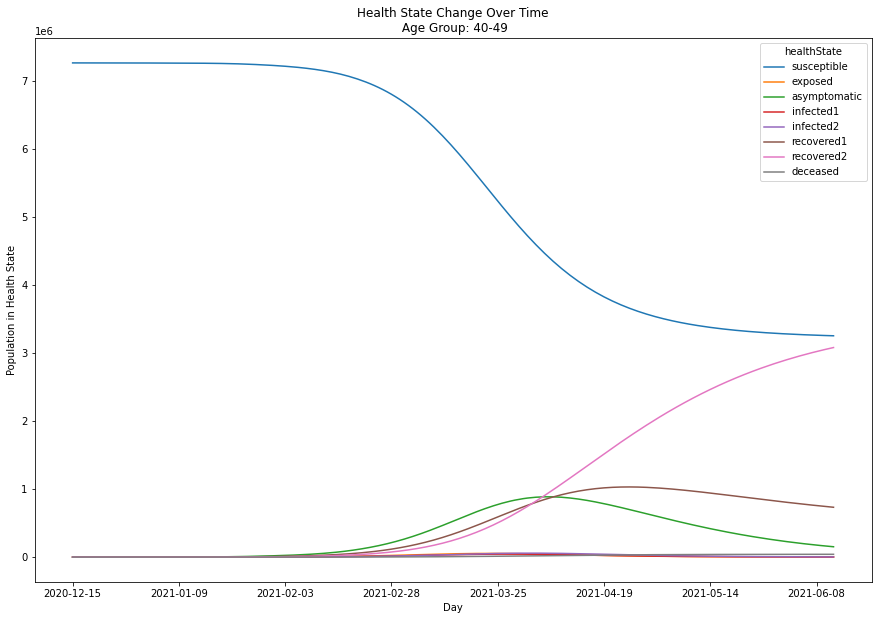

In [6]:
# ageGroups = ["0-9", "10-19", "20-29",  "30-39",  "40-49", "50-59", "60-69", "70-79", "80+"]

# Set your filter from ageGroups above:
ageGroup = "40-49"

plot_it(df, ageGroup)

### Plot all Age Groups

<Figure size 1600x800 with 0 Axes>

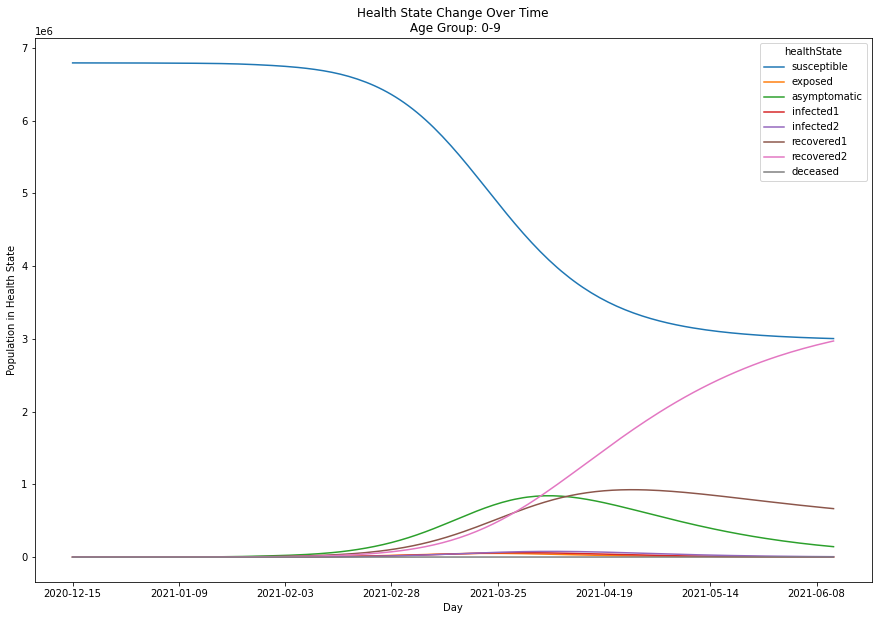

<Figure size 1600x800 with 0 Axes>

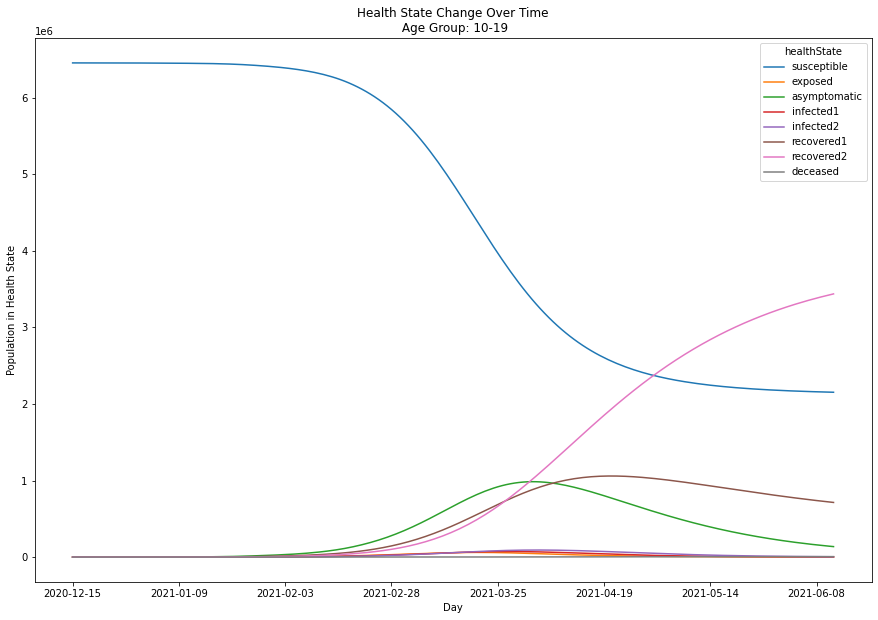

<Figure size 1600x800 with 0 Axes>

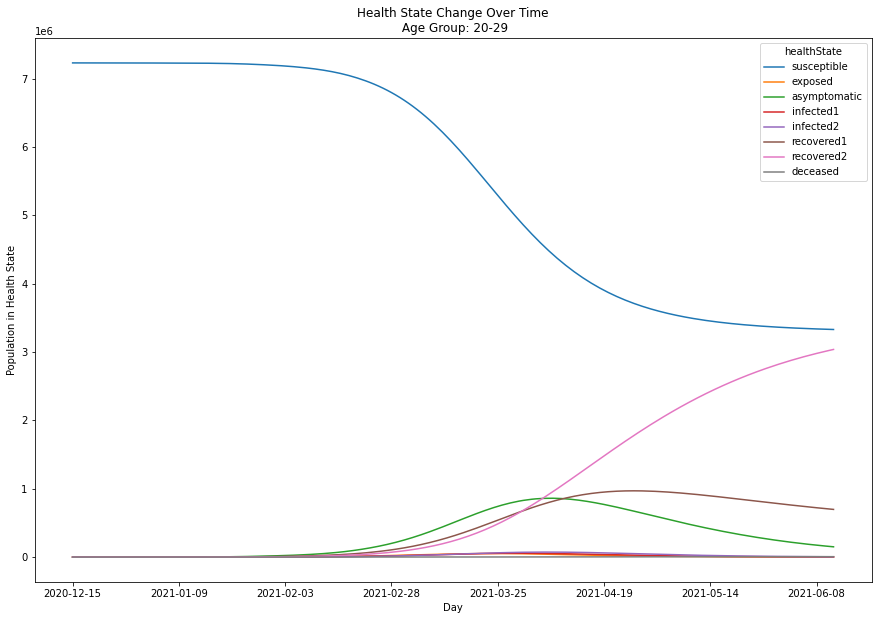

<Figure size 1600x800 with 0 Axes>

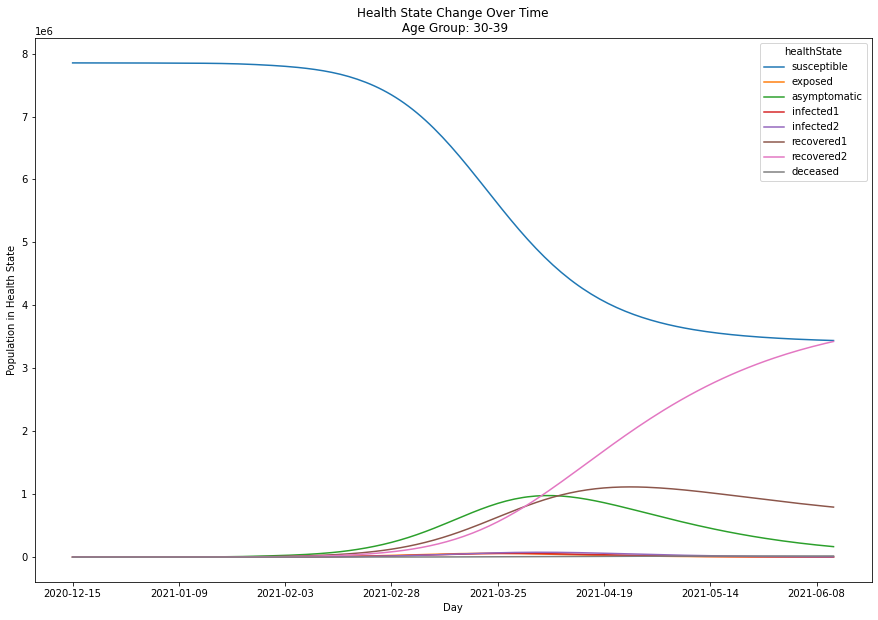

<Figure size 1600x800 with 0 Axes>

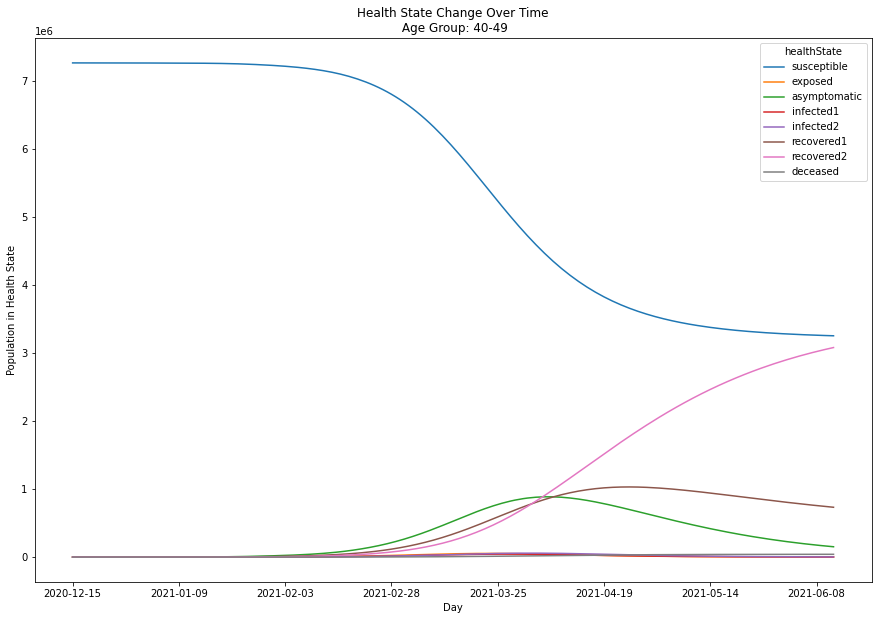

<Figure size 1600x800 with 0 Axes>

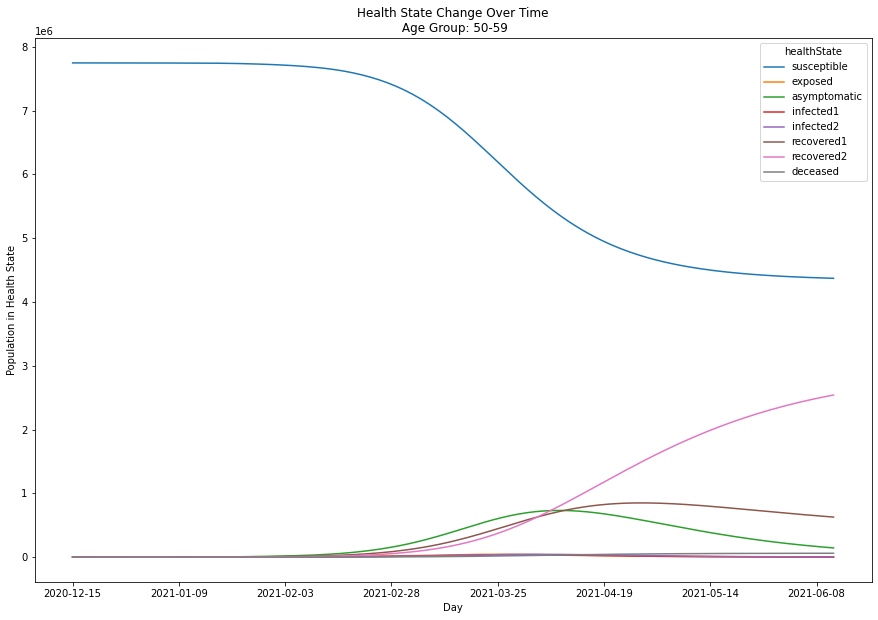

<Figure size 1600x800 with 0 Axes>

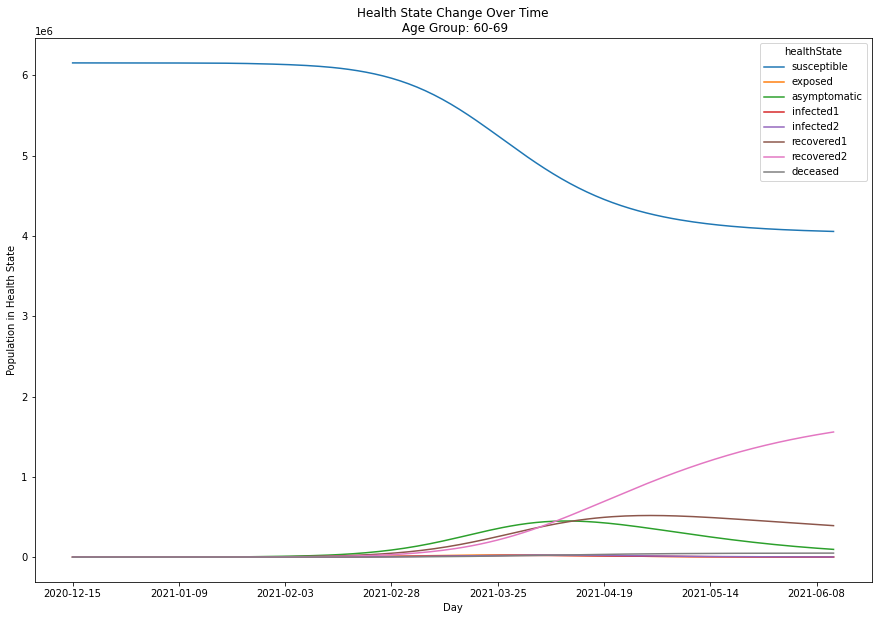

<Figure size 1600x800 with 0 Axes>

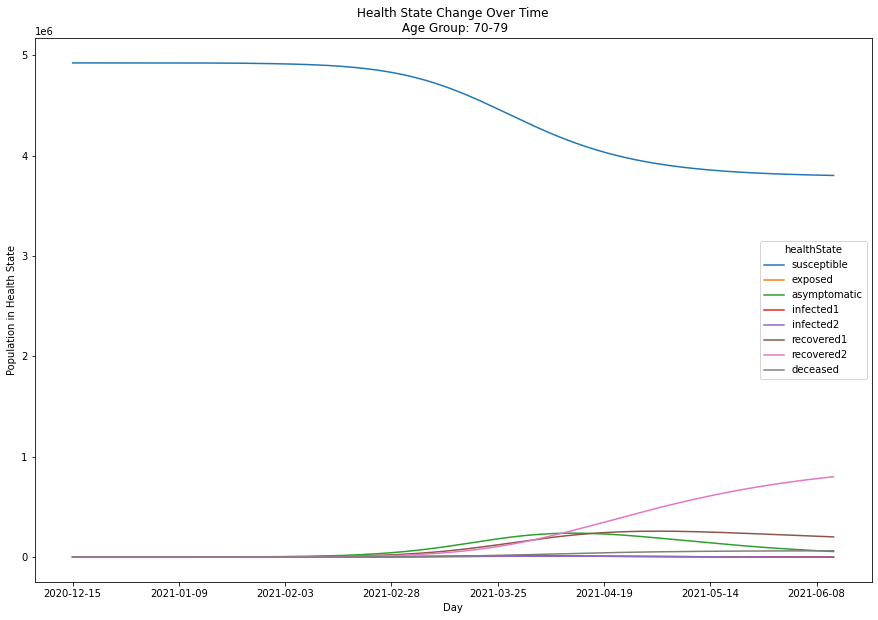

<Figure size 1600x800 with 0 Axes>

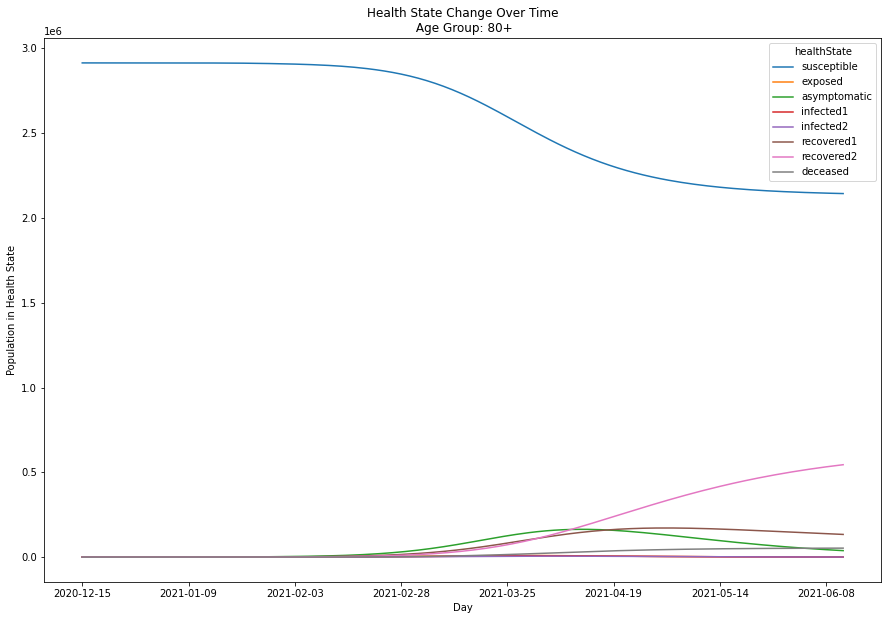

In [7]:
ageGroups = ["0-9", "10-19", "20-29",  "30-39",  "40-49", "50-59", "60-69", "70-79", "80+"]

for ageGroup in ageGroups:
    plot_it(df, ageGroup)